# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
!pwd
# Read in out dataframe
ski_data=pd.read_csv('data/step3_output.csv', index_col=[0])
ski_data.head()

/Users/jeremysilva/desktop/Springboard/Guided_Capstone


,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,K-Means Clusters
0,Alyeska Resort,Alaska,3939,2500,250,1,0.0,0,2,2,...,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,0
1,Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0.0,0,0,0,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,0
2,Hilltop Ski Area,Alaska,2090,294,1796,0,0.0,0,0,0,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,0
3,Arizona Snowbowl,Arizona,11500,2300,9200,0,0.0,1,0,2,...,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,1
4,Sunrise Park Resort,Arizona,11100,1800,9200,0,0.0,0,1,2,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,1


## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [2]:
# Import all necesary packages 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
from sklearn.metrics import explained_variance_score, mean_absolute_error
# Creating a new data set to model off with the appropriate columns removed
ski_data_model= ski_data.drop(columns=['state','summit_elev', 'base_elev'])
# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X = ski_data_model.drop(['Name','AdultWeekend'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y= ski_data_model['AdultWeekend']

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = preprocessing.StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(X)

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
y_pred= model.predict(X_test)

In [3]:
evs= explained_variance_score(y_test, y_pred)
evs

0.9310919745297067

In [4]:
# You might want to make a pandas DataFrame displaying the coefficients for each state like so: 
coeff= pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])
# Convert the coeffiecients to absolute values
coeff= coeff.abs()
# Sort the values by Cofficient in dewcending order to view the response variables with largest impact 
coeff= coeff.sort_values(by='Coefficient', ascending=False)
coeff.head(10)

,Coefficient
AdultWeekday,19.944961
vertical_drop,1.765980
Runs,1.688866
quad,1.519045
averageSnowfall,1.452734
triple,1.415659
K-Means Clusters,1.325113
surface,1.291793
daysOpenLastYear,0.996819
fastQuads,0.796040


In [5]:
ski_data[ski_data['Name']== 'Whitefish Mountain Resort']

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,K-Means Clusters
151,Whitefish Mountain Resort,Montana,6817,2353,4464,0,0.0,0,3,2,...,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,2


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [6]:
# It looks like Big Mountain changed it's name to Whitefish Mountain Resort at some point so we will be using this name from now on
ski_data[ski_data['Name'].str.contains('Whitefish Mountain Resort')]

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,K-Means Clusters
151,Whitefish Mountain Resort,Montana,6817,2353,4464,0,0.0,0,3,2,...,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,2


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [7]:
whitefish= ski_data[ski_data['Name'].str.contains('Whitefish Mountain Resort')]
whitefish= whitefish.drop(columns=['state','summit_elev', 'base_elev'])
whitefish

,Name,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,K-Means Clusters
151,Whitefish Mountain Resort,2353,0,0.0,0,3,2,6,0,3,...,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,2


**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [8]:
# Set the whitefish variable for prediction
whitefish_X= whitefish.drop(['Name','AdultWeekend'], axis=1)

# Scale X using the same scaler we used for the model
whitefish_X_scaled=scaler.transform(whitefish_X)



In [58]:
# Run the model prediction on whitefish to see predicted AdultWeekend
price_predicted= model.predict(whitefish_X_scaled)
print('Based on our modeling we predict the AdultWeekend Price of Whitefish will be ' + str(price_predicted))

Based on our modeling we predict the AdultWeekend Price of Whitefish will be [88.12347449]


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [65]:
# It apprears the ctually price of AdultWeekend at Whitefish is 7 dollars less than the predicted price
real_price= whitefish['AdultWeekend']
real_price

151    81.0
Name: AdultWeekend, dtype: float64

**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

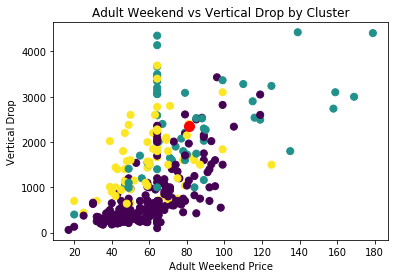

In [51]:
plt.scatter(ski_data['AdultWeekend'], ski_data['vertical_drop'], c=ski_data['K-Means Clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(whitefish['AdultWeekend'], whitefish['vertical_drop'], c='red', s=100)
plt.xlabel('Adult Weekend Price')
plt.ylabel('Vertical Drop')
plt.title('Adult Weekend vs Vertical Drop by Cluster')
plt.savefig('figures/summit_elev_vertical_drop.png',bbox_inches='tight')

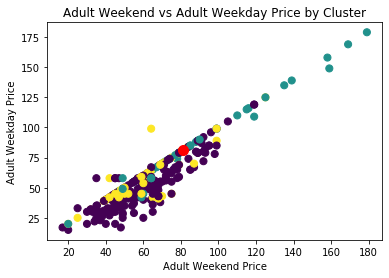

In [52]:
plt.scatter(ski_data['AdultWeekend'], ski_data['AdultWeekday'], c=ski_data['K-Means Clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(whitefish['AdultWeekend'], whitefish['AdultWeekday'], c='red', s=100)
plt.xlabel('Adult Weekend Price')
plt.ylabel('Adult Weekday Price')
plt.title('Adult Weekend vs Adult Weekday Price by Cluster')
plt.savefig('figures/AdultWeekend_AdultWeekday',bbox_inches='tight')

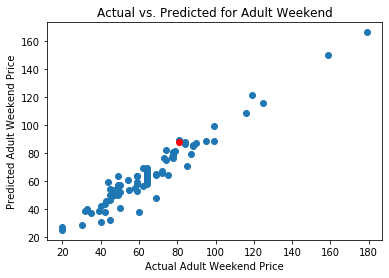

In [55]:
# Look at predicted vs actual
plt.scatter(x=y_test, y=y_pred)
plt.scatter(x=real_price, y=price_predicted, c='red')
plt.xlabel('Actual Adult Weekend Price')
plt.ylabel('Predicted Adult Weekend Price')
plt.title('Actual vs. Predicted for Adult Weekend')
plt.savefig('figures/actual_v_predicted_adult_weekend.png')

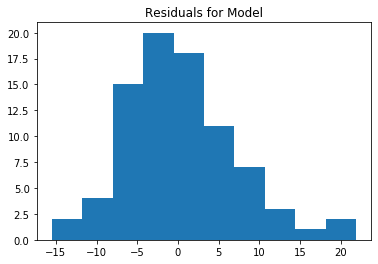

In [54]:
# Plot the distribution of the residuals for out model
plt.hist(x= y_test - y_pred)
plt.title('Residuals for Model')
plt.savefig('figures/model_resid_plot.png')

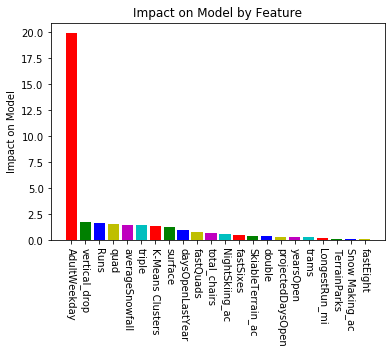

In [49]:
my_colors='rgbymc'
plt.bar(x=coeff.index, height=coeff['Coefficient'], color=my_colors)
plt.xticks(rotation=-90)
plt.ylabel('Impact on Model')
plt.title('Impact on Model by Feature')
plt.savefig('Impact_by_feature.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [0]:
#import pickle
#s = pickle.dumps(model)
#from joblib import dump, load
#dump(model, 'models/regression_model_adultweekend.joblib') 

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 